In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../..')  # Adjust the path as necessary to import from model package

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from model.data.loaders.loader_xgboost import load_data_h5

h5_path = '../data/train/methylation.h5'
id_path = '../data/train/idmap.csv'
X, y = load_data_h5(h5_path, id_path, indices=None)

In [9]:
pca = PCA(
    n_components=100, 
    n_oversamples=50, 
    power_iteration_normalizer='auto', 
    svd_solver='randomized', 
    random_state=42
)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(1026, 100)


In [10]:
df = pd.DataFrame(X_pca)
corr_matrix = df.T.corr()
print(corr_matrix.shape)

# Get in each column the number of correlations above 0.7
high_corr = (corr_matrix > 0.7).sum()
print(high_corr)

(1026, 1026)
0       298
1       298
2       299
3       299
4       299
       ... 
1021    283
1022    231
1023    244
1024    251
1025    263
Length: 1026, dtype: int64


c:\Users\Owner\Documents\GitHub\epigenetic-memory-loss-methylation\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Owner\Documents\GitHub\epigenetic-memory-loss-methylation\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


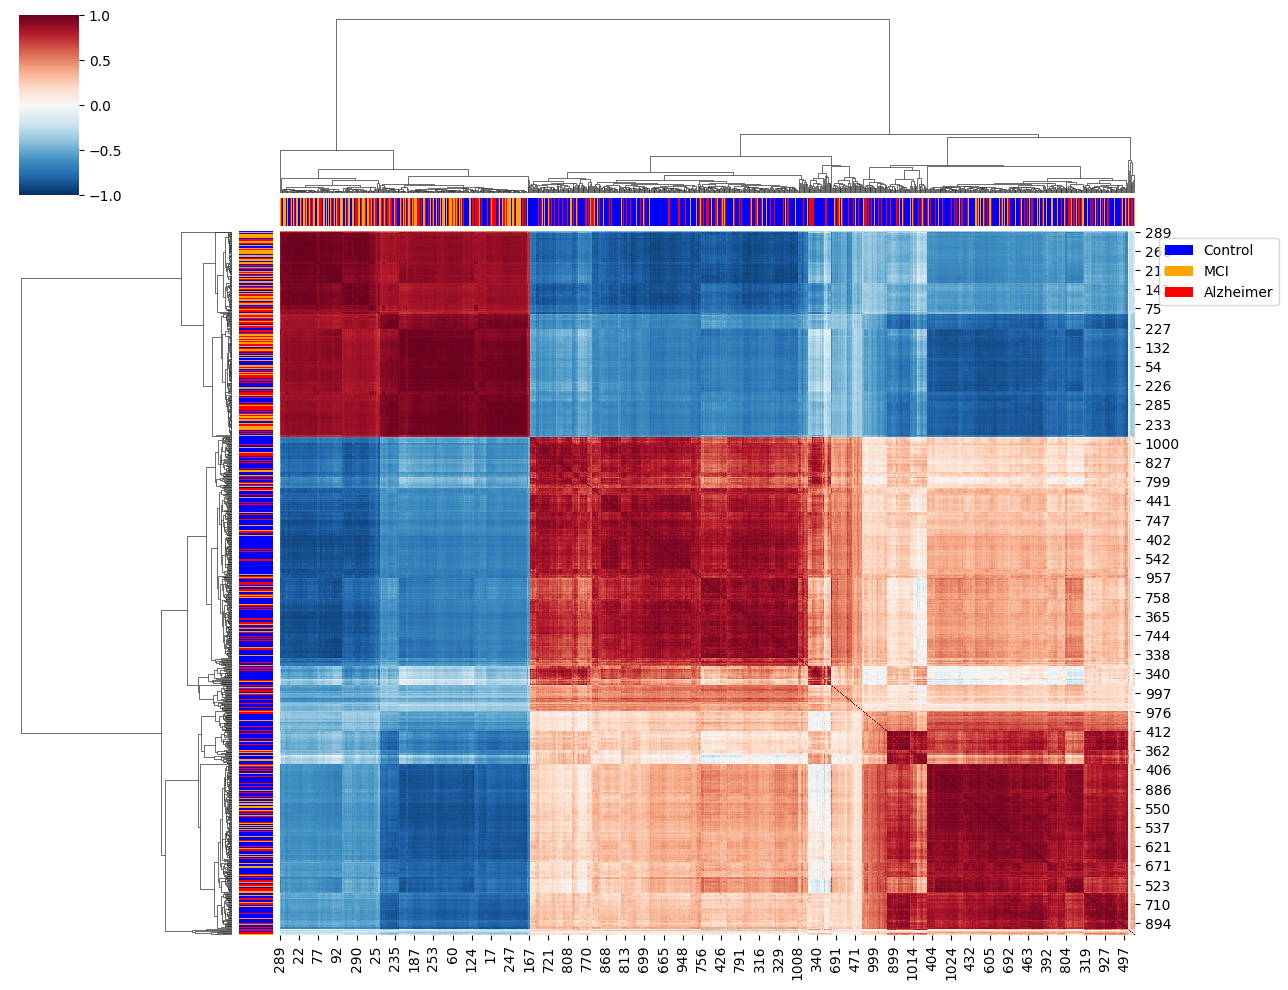

In [13]:
# Create a color mapping for your labels
label_colors = {0: 'blue', 1: 'orange', 2: 'red'}  # Control, MCI, Alzheimer
row_colors = [label_colors[label] for label in y]

# Create the clustermap with row colors
g = sns.clustermap(
    corr_matrix, 
    figsize=(12, 10),
    row_colors=row_colors,
    col_colors=row_colors,  # Same colors for columns since it's symmetric
    cmap='RdBu_r',  # Better colormap for correlation
    center=0,       # Center colormap at 0
    vmin=-1, vmax=1  # Correlation range
)

# Add a legend for the row colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='Control'),
    Patch(facecolor='orange', label='MCI'), 
    Patch(facecolor='red', label='Alzheimer')
]
g.ax_heatmap.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.show()